In [99]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf

In [100]:
#loading the data
data=pd.read_csv('F:/pol/02 Deep Learning/Datasets/winequality-red.csv')
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [101]:
# divide the data 
train_data=data.sample(frac=0.75,random_state=4)
val_data=data.drop(train_data.index)
print('shape of the original data: ',data.shape)
print('shape of the train data: ',train_data.shape)
print('shape of the validation data: ',val_data.shape )

shape of the original data:  (1599, 12)
shape of the train data:  (1199, 12)
shape of the validation data:  (400, 12)


In [102]:
# normalizing the data
max_value=train_data.max()
min_value=train_data.min()
nor_train_data=(train_data-min_value)/(max_value-min_value)
nor_val_data=(val_data-min_value)/(max_value-min_value)

In [103]:
# seperating the independent features and dependent features
x_train=nor_train_data.drop('quality',axis=1)
x_val=nor_val_data.drop('quality',axis=1)
y_train=nor_train_data['quality']
y_val=nor_val_data['quality']

In [104]:
# converting x_train,y_train,x_test,y_test into numpy arrays
x_train=x_train.to_numpy().astype(np.float32)
x_val=x_val.to_numpy().astype(np.float32)
y_train=y_train.to_numpy().astype(np.float32)
y_val=y_val.to_numpy().astype(np.float32)

In [105]:
# input shape
input_shape= x_train.shape[1]
print('input_shape: ',input_shape)

input_shape:  11


In [106]:
# create the linear model
#model=tf.keras.Sequential([
 #   tf.keras.layers.Dense(units=1,input_shape=(input_shape,))
#])
# model summary
#model.summary()

In [107]:
# create the multilayer neural network
model=tf.keras.Sequential([
    tf.keras.layers.Dense(units=128,activation='relu',input_shape=(input_shape,)),
    tf.keras.layers.Dense(units=64,activation='relu'),
    tf.keras.layers.Dense(units=32,activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.summary()

C:\Users\polro\anaconda3\envs\cleanenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                     │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [108]:
# compile the model
model.compile(optimizer='adam',
             loss='mae',
             metrics=['accuracy'])

In [113]:
# train the model
losses=model.fit(
    x_train,y_train,
    validation_data=(x_val,y_val),
    batch_size=256,
    epochs=100
)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0175 - loss: 0.0806 - val_accuracy: 0.0150 - val_loss: 0.0955
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0196 - loss: 0.0796 - val_accuracy: 0.0150 - val_loss: 0.0956
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0196 - loss: 0.0800 - val_accuracy: 0.0150 - val_loss: 0.0961
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0167 - loss: 0.0815 - val_accuracy: 0.0150 - val_loss: 0.0957
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0230 - loss: 0.0822 - val_accuracy: 0.0150 - val_loss: 0.0958
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0146 - loss: 0.0795 - val_accuracy: 0.0150 - val_loss: 0.0956
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0144 - loss: 0.0789 - val_accuracy: 0.0150 - val_loss: 0.0952
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0172 - loss: 0.0789 - val_accuracy: 0.0150 - val_loss:

Epoch 52/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0186 - loss: 0.0757 - val_accuracy: 0.0150 - val_loss: 0.0963
Epoch 53/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0186 - loss: 0.0751 - val_accuracy: 0.0150 - val_loss: 0.0954
Epoch 54/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0203 - loss: 0.0757 - val_accuracy: 0.0150 - val_loss: 0.0954
Epoch 55/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0186 - loss: 0.0752 - val_accuracy: 0.0150 - val_loss: 0.0963
Epoch 56/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0200 - loss: 0.0721 - val_accuracy: 0.0150 - val_loss: 0.0956
Epoch 57/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0152 - loss: 0.0741 - val_accuracy: 0.0150 - val_loss: 0.0960
Epoch 58/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0241 - loss: 0.0783 - val_accuracy: 0.0150 - val_loss: 0.0970
Epoch 59/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0200 - loss: 0.0778 - val_accuracy: 0.0150 - v

In [111]:
model.predict(x_val[0:5,:])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.40437728],
       [0.42579964],
       [0.39346606],
       [0.48115113],
       [0.42299655]], dtype=float32)

In [112]:
y_val[:5]

array([0.4, 0.4, 0.4, 0.8, 0.4], dtype=float32)

<Axes: >

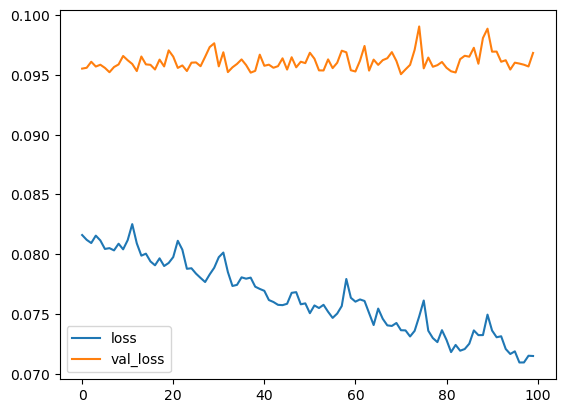

In [117]:
# training loss vs validation loss
loss_df=pd.DataFrame(losses.history)
loss_df.loc[:,['loss','val_loss']].plot()

In [118]:
# repeat 

In [195]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [196]:
data=pd.read_csv('F:/pol/02 Deep Learning/Datasets/winequality-red.csv')
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [197]:
# normalize the data
max_val=data.max()
min_val=data.min()
nor_data=(data-min_val)/(max_val-min_val)
nor_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [198]:
# split the data
train_data=nor_data.sample(frac=0.75,random_state=5)
val_data=nor_data.drop(train_data.index)

In [199]:
print('x_train shape: ',x_train.shape)
print('x_validatation shape: ',x_val.shape)

x_train shape:  (1199, 11)
x_validatation shape:  (400, 11)


In [200]:
# seperating input and output features
x_train=train_data.drop('quality',axis=1)
x_val=val_data.drop('quality',axis=1)
y_train=train_data['quality']
y_val=val_data['quality']

In [201]:
# converting pandas dataframe into numpy arrays
x_train=x_train.to_numpy().astype(np.float32)
x_val=x_val.to_numpy().astype(np.float32)
y_train=y_train.to_numpy().astype(np.float32)
y_val=y_val.to_numpy().astype(np.float32)

In [207]:
input_shape=x_train.shape[1]
print(input_shape)

11


In [208]:
# build a model
model=Sequential([
    Dense(128,activation='relu',input_shape=(input_shape,)),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(1)
])
model.summary()

C:\Users\polro\anaconda3\envs\cleanenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_47 (Dense)                     │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,369 (103.00 KB)

 Trainable params: 26,369 (103.00 KB)

 Non-trainable params: 0 (0.00 B)

In [209]:
# compile the model
model.compile(
optimizer='adam',
loss='mse',
metrics=['accuracy']    
)

In [216]:
# train the model
losses=model.fit(
x_train,y_train,
    validation_data=(x_val,y_val),
    epochs=15,
    batch_size=256
)

Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0178 - loss: 0.0138 - val_accuracy: 0.0100 - val_loss: 0.0161
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0144 - loss: 0.0147 - val_accuracy: 0.0100 - val_loss: 0.0160
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0178 - loss: 0.0140 - val_accuracy: 0.0100 - val_loss: 0.0159
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0181 - loss: 0.0141 - val_accuracy: 0.0100 - val_loss: 0.0160
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0164 - loss: 0.0139 - val_accuracy: 0.0100 - val_loss: 0.0161
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0175 - loss: 0.0140 - val_accuracy: 0.0100 - val_loss: 0.0162
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0225 - loss: 0.0145 - val_accuracy: 0.0100 - val_loss: 0.0161
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0206 - loss: 0.0148 - val_accuracy: 0.0100 - val_loss: 0.0160


In [213]:
# model prediction
model.predict(x_val[0:3,:])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[0.43464774],
       [0.44360137],
       [0.5325261 ]], dtype=float32)

In [214]:
# actual values
y_val[:3]

array([0.4, 0.4, 0.4], dtype=float32)

<Axes: >

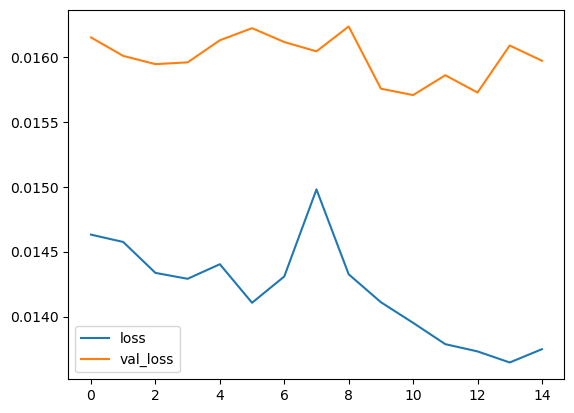

In [217]:
loss_df=pd.DataFrame(losses.history)
loss_df.loc[:,['loss','val_loss']].plot()

<Axes: >

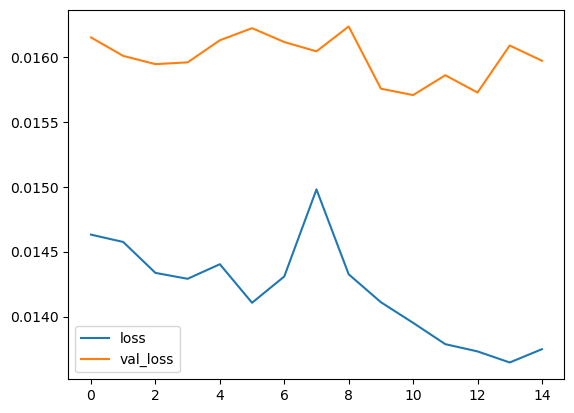

In [223]:
losses_df=pd.DataFrame(losses.history)
losses_df.loc[:,['loss','val_loss']].plot()